In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
import numpy as np
import mglearn 

%matplotlib inline
import sklearn.model_selection as StandardScaler
from sklearn.decomposition import PCA

In [3]:
import pyodbc 
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=SRVDWHBI;'
                      'Database=STAGING;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()

dataset = pd.read_sql_query("""SELECT * FROM STAGING..TEMP_CLIENTE_FRAUDES""",conn)

In [4]:

dataset_modelo =dataset.drop(['ICODIGOPERSONA', 'ICODIGOCLIENTE', 'INUMEROSOLICITUD', 'cuota_ultimo_pago'], axis=1)

In [5]:
dataset_modelo.describe()

,cupo_total,cupo_asignado_mes,cupo_asignado_total,cupo_utilizado_mes,cupo_utilizado_total,cupo_disponible_mes,cupo_disponible_total,CANTIDAD_CONSUMOS,CONSUMOS_CANCELADOS,CONSUMOS_PENDIENTES,...,IVALORAFINANCIAR,monto_corriente,monto_vencido,monto_vencer,dias_atraso_promedio,monto_ultimo_pago,GESTIONNEGATIVA,NOCONTACTADO,ENGESTION,OTROS
count,167742.000000,167742.000000,167742.000000,167742.000000,167742.000000,167742.000000,167742.000000,167742.000000,167742.000000,167742.000000,...,167742.000000,167742.000000,167742.000000,167742.000000,167742.000000,167742.000000,167742.000000,167742.000000,167742.000000,167742.000000
mean,1157.112124,89.008012,1068.104112,37.078859,597.619324,51.929153,596.571659,0.582192,0.243189,0.339003,...,549.566668,24.693903,240.628172,366.405224,83.301332,94.490004,0.032508,0.792008,0.020037,0.614712
std,381.169234,29.320820,351.848414,58.385360,1071.305376,63.795191,1078.188109,0.879721,0.607562,0.636839,...,890.326993,46.591970,717.649648,785.228435,238.109500,366.603567,0.235611,1.669178,0.158906,1.438854
min,0.000000,0.000000,0.000000,0.000000,0.000000,-654.410000,-6226.070000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-770.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1083.330000,83.330000,1000.000000,0.000000,0.000000,1.000000,13.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1170.000000,90.000000,1080.000000,0.000000,0.000000,83.330000,1083.330000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1300.000000,100.000000,1200.000000,71.370000,822.332500,100.000000,1300.000000,1.000000,0.000000,1.000000,...,898.170000,32.127500,0.000000,306.242500,0.000000,50.510000,0.000000,1.000000,0.000000,1.000000
max,3791.670000,291.670000,3500.000000,737.740000,8449.720000,270.250000,3509.500000,20.000000,17.000000,9.000000,...,5752.480000,938.080000,22426.440000,16850.400000,1752.000000,5333.190000,7.000000,25.000000,5.000000,29.000000


In [19]:
#dataset_modelo.select_dtypes(include=['float64', 'int']).describe()
dataset_modelo

,CNUMEROTARJETA,CNUMEROIDENTIFICACION,CCODIGOALMACENCAPTACION,CCODIGOFORMALIDAD,CCODIGOORIGENCREDITO,CCODIGOVENDEDOR,CI_EMPRENDEDOR,CCODIGOCANTON,CCODIGOOFICINARETIRO,CCODIGOOFICINAACTIVACION,...,monto_corriente,monto_vencido,monto_vencer,dias_atraso_promedio,monto_ultimo_pago,GESTIONNEGATIVA,NOCONTACTADO,ENGESTION,OTROS,ESTAFADOR
0,0142720925303653,0925303653,AW,985,113,490100,0912538873,GUAYA,AR,9999,...,0.0,0.00,0.0,0.0,0.00,0,0,0,0,N
1,0142720928258763,0928258763,AW,985,113,490100,0909096182,DURAN,AW,9999,...,0.0,0.00,0.0,0.0,0.00,0,0,0,0,N
2,0142720910693001,0910693001,AW,985,113,490100,1308367125,GUAYA,AS,9999,...,0.0,1143.92,0.0,1054.0,343.23,0,0,0,0,N
3,0146760930619630,0930619630,AW,985,113,490100,1308642212,GUAYA,AT,9999,...,0.0,0.00,0.0,0.0,0.00,0,0,0,0,N
4,0146760919234203,0919234203,AW,985,113,490100,0914912274,GUAYA,AA,9999,...,0.0,0.00,0.0,0.0,71.34,0,0,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167737,0146761710450600,1710450600,QA,985,113,490110,1708306996,QUITO,QG,QG,...,0.0,0.00,0.0,0.0,49.86,0,0,0,0,N
167738,0146760907367817,0907367817,AW,985,113,490100,0909710550,GUAYA,AG,9999,...,0.0,0.00,0.0,0.0,0.00,0,0,0,0,N
167739,0146760913641569,0913641569,AW,985,113,490100,0915708622,GUAYA,AW,9999,...,0.0,0.00,0.0,0.0,0.00,0,0,0,0,N
167740,0142720928710771,0928710771,AW,985,113,490100,0957614829,DURAN,AN,9999,...,0.0,1625.87,0.0,962.0,1187.37,0,0,0,0,N


In [6]:
dataset_modelo =dataset_modelo.dropna()
dataset_modelo.corr()

,cupo_total,cupo_asignado_mes,cupo_asignado_total,cupo_utilizado_mes,cupo_utilizado_total,cupo_disponible_mes,cupo_disponible_total,CANTIDAD_CONSUMOS,CONSUMOS_CANCELADOS,CONSUMOS_PENDIENTES,...,IVALORAFINANCIAR,monto_corriente,monto_vencido,monto_vencer,dias_atraso_promedio,monto_ultimo_pago,GESTIONNEGATIVA,NOCONTACTADO,ENGESTION,OTROS
cupo_total,1.000000,1.000000,1.000000,0.066026,0.043871,0.379246,0.311578,0.134694,0.109527,0.067285,...,0.065765,0.064303,-0.026688,0.119218,-0.041341,-0.000197,0.003560,-0.027514,0.019413,-0.042518
cupo_asignado_mes,1.000000,1.000000,1.000000,0.066028,0.043871,0.379244,0.311578,0.134698,0.109527,0.067290,...,0.065767,0.064307,-0.026695,0.119224,-0.041348,-0.000198,0.003561,-0.027514,0.019415,-0.042518
cupo_asignado_total,1.000000,1.000000,1.000000,0.066026,0.043871,0.379246,0.311578,0.134694,0.109527,0.067285,...,0.065765,0.064303,-0.026687,0.119217,-0.041341,-0.000197,0.003560,-0.027514,0.019412,-0.042518
cupo_utilizado_mes,0.066026,0.066028,0.066026,1.000000,0.799623,-0.898237,-0.716261,-0.019283,-0.368713,0.412029,...,0.123564,0.741987,0.316696,0.661306,0.048216,-0.209718,0.141726,0.413322,0.141574,0.371806
cupo_utilizado_total,0.043871,0.043871,0.043871,0.799623,1.000000,-0.722183,-0.935024,-0.011725,-0.331167,0.378300,...,0.210319,0.685146,0.587845,0.674158,0.240023,-0.169427,0.107806,0.357774,0.069262,0.309688
cupo_disponible_mes,0.379246,0.379244,0.379246,-0.898237,-0.722183,1.000000,0.801445,0.077212,0.390158,-0.352443,...,-0.085615,-0.659734,-0.305437,-0.560727,-0.062924,0.194388,-0.129857,-0.395401,-0.122733,-0.363511
cupo_disponible_total,0.311578,0.311578,0.311578,-0.716261,-0.935024,0.801445,1.000000,0.057927,0.347341,-0.329666,...,-0.179319,-0.617539,-0.576825,-0.591886,-0.250841,0.156736,-0.098052,-0.342473,-0.054100,-0.302219
CANTIDAD_CONSUMOS,0.134694,0.134698,0.134694,-0.019283,-0.011725,0.077212,0.057927,1.000000,0.737113,0.590362,...,0.304004,-0.019892,0.001069,0.036398,0.026535,0.105064,-0.044156,-0.122987,-0.053050,-0.118786
CONSUMOS_CANCELADOS,0.109527,0.109527,0.109527,-0.368713,-0.331167,0.390158,0.347341,0.737113,1.000000,-0.110276,...,0.138546,-0.298864,-0.124285,-0.205549,-0.002283,0.220722,-0.091234,-0.306145,-0.071003,-0.266784
CONSUMOS_PENDIENTES,0.067285,0.067290,0.067285,0.412029,0.378300,-0.352443,-0.329666,0.590362,-0.110276,1.000000,...,0.281640,0.327707,0.150017,0.299040,0.041753,-0.109106,0.044027,0.184774,0.006782,0.143940


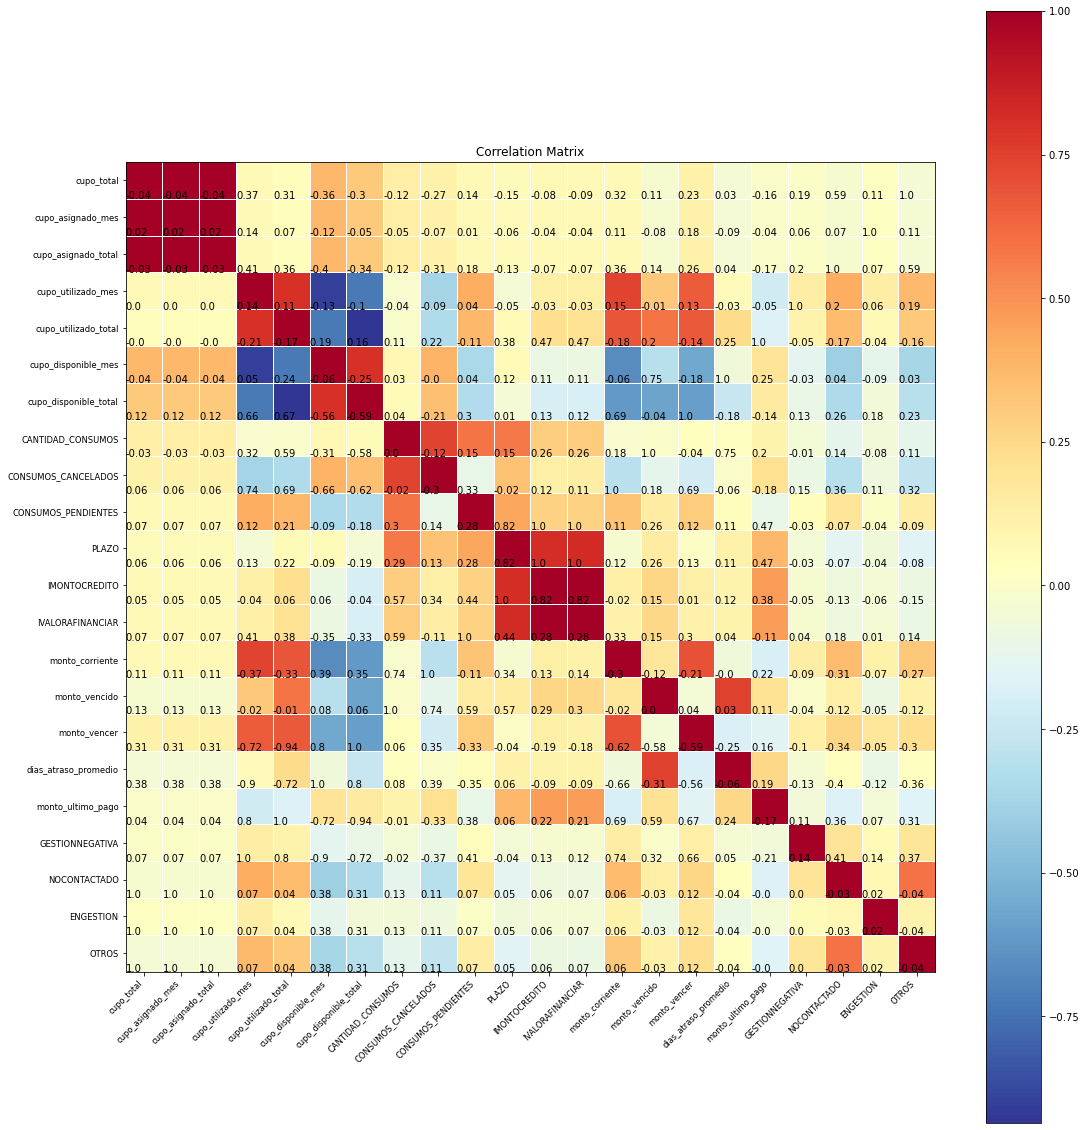

In [7]:
plt.rcParams["figure.figsize"] = (16, 16)

corr = dataset_modelo.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(i, j, round(corr.iloc[i,j], 2))

plt.show()


In [37]:

df = dataset_modelo.select_dtypes(include=['float64', 'int64'])
df

,cupo_total,cupo_asignado_mes,cupo_asignado_total,cupo_utilizado_mes,cupo_utilizado_total,cupo_disponible_mes,cupo_disponible_total,CANTIDAD_CONSUMOS,CONSUMOS_CANCELADOS,CONSUMOS_PENDIENTES,...,IVALORAFINANCIAR,monto_corriente,monto_vencido,monto_vencer,dias_atraso_promedio,monto_ultimo_pago,GESTIONNEGATIVA,NOCONTACTADO,ENGESTION,OTROS
2,1300.00,100.00,1200.00,0.01,153.11,99.99,1146.90,2.0,2.0,0.0,...,462.61,0.00,1143.92,0.00,1054.0,343.23,0,0,0,0
4,1950.00,150.00,1800.00,0.00,0.00,150.00,1950.00,2.0,2.0,0.0,...,787.40,0.00,0.00,0.00,0.0,71.34,0,0,0,0
5,1866.56,143.58,1722.98,66.02,307.80,77.56,1624.78,2.0,1.0,1.0,...,1030.90,1.25,306.55,0.00,570.0,120.00,0,1,0,2
7,1083.33,83.33,1000.00,0.00,0.00,83.33,1083.33,2.0,2.0,0.0,...,682.93,0.00,0.00,0.00,0.0,42.29,0,0,0,0
8,1083.33,83.33,1000.00,26.28,485.66,57.05,623.95,0.0,0.0,0.0,...,0.00,26.28,433.12,26.26,384.0,0.00,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167732,1300.00,100.00,1200.00,0.00,0.00,100.00,1300.00,1.0,1.0,0.0,...,1785.16,0.00,0.00,0.00,0.0,272.41,0,0,0,0
167735,1950.00,150.00,1800.00,57.29,874.89,92.71,1132.40,1.0,1.0,0.0,...,962.48,57.29,416.64,400.96,203.0,137.55,0,2,0,1
167736,1635.28,125.79,1509.49,0.00,0.00,125.79,1635.28,1.0,1.0,0.0,...,822.89,0.00,0.00,0.00,0.0,48.79,0,0,0,0
167738,13.00,1.00,12.00,0.00,0.00,1.00,13.00,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0,0,0,0


                            PC0       PC1       PC2       PC3       PC4  \
cupo_total            -0.067401  0.228637  0.482834  0.134572 -0.012891   
cupo_asignado_mes     -0.067400  0.228638  0.482835  0.134566 -0.012893   
cupo_asignado_total   -0.067401  0.228637  0.482834  0.134573 -0.012891   
cupo_utilizado_mes     0.371950  0.018227  0.126083 -0.039988  0.006347   
cupo_utilizado_total   0.379172  0.071605  0.061568  0.122298  0.063058   
cupo_disponible_mes   -0.374605  0.083806  0.095756  0.096355 -0.011565   
cupo_disponible_total -0.380161  0.010090  0.115580 -0.076777 -0.066973   
CANTIDAD_CONSUMOS     -0.024919  0.324917 -0.046719 -0.311074  0.514887   
CONSUMOS_CANCELADOS   -0.190574  0.221749 -0.067294 -0.182106  0.366714   
CONSUMOS_PENDIENTES    0.190972  0.213022  0.011663 -0.240010  0.319277   
PLAZO                  0.014817  0.425410 -0.190154 -0.136991 -0.053503   
IMONTOCREDITO          0.085464  0.409787 -0.175963 -0.024126 -0.333974   
IVALORAFINANCIAR       0.

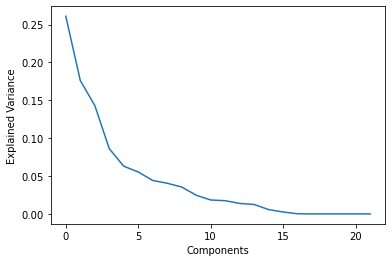

In [24]:
# You must normalize the data before applying the fit method
df_normalized=(df - df.mean()) / df.std()
pca = PCA(n_components=df.shape[1])
pca.fit(df_normalized)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
index=df.columns)
print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

In [26]:
pca = PCA(n_components=2)
pca.fit(df)

PCA(n_components=2)

In [27]:
#reduce a 2 dimenciones
transformada= pca.transform(df)

In [30]:
transformada.shape
dataset_modelo['ESTAFADOR'].values

array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype=object)

Text(0.5, 0, 'PCA 2')

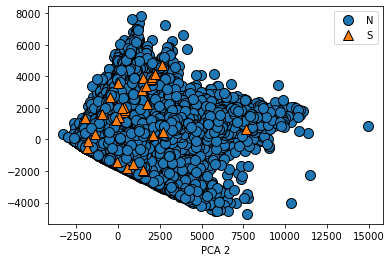

In [34]:
mglearn.discrete_scatter(transformada[:,0], transformada[:,1], dataset_modelo['ESTAFADOR'] )
plt.legend(dataset_modelo['ESTAFADOR'].unique(), loc='best')

plt.xlabel('PCA 1')
plt.xlabel('PCA 2')

Text(0.5, 0, 'PCA 2')

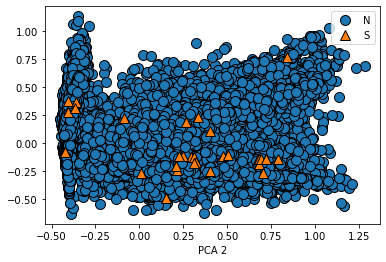

In [40]:
from sklearn.preprocessing import MinMaxScaler

escalar=MinMaxScaler()
escalar.fit(df)
escalada=escalar.transform(df)
pca.fit(escalada)
transformada=pca.transform(escalada)
mglearn.discrete_scatter(transformada[:,0], transformada[:,1], dataset_modelo['ESTAFADOR'] )
plt.legend(dataset_modelo['ESTAFADOR'].unique(), loc='best')

plt.xlabel('PCA 1')
plt.xlabel('PCA 2')